In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("house-prices.csv")

In [4]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


Several columns contain missing values, which need to be handled before further analysis.

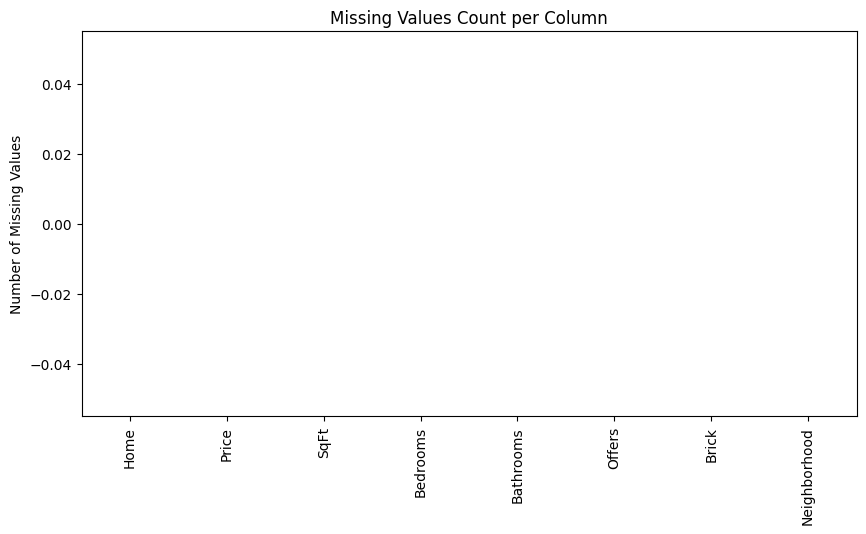

In [6]:
df.isnull().sum().plot(kind='bar', figsize=(10,5))
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.show()

In [8]:
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


In [10]:
df.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols_with_na = [col for col in num_cols if df[col].isnull().sum() > 0]


In [13]:
num_cols_with_na

[]

In [14]:
for col in num_cols_with_na:
    df[col].fillna(df[col].median(), inplace=True)

Missing values in numerical columns were handled using median imputation after identifying columns that contained null values.

In [15]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_with_na = [col for col in cat_cols if df[col].isnull().sum() > 0]

for col in cat_cols_with_na:
    df[col].fillna(df[col].mode()[0], inplace=True)

Missing values in categorical columns were handled using mode imputation to preserve the most frequent category.

In [16]:
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


In [17]:
df.shape

(128, 8)

After handling missing values, the dataset contains the same number of rows and columns, indicating that data quality was improved without significant data loss.

In [19]:
df.to_csv("cleaned_house_prices.csv", index=False)

The cleaned dataset was saved as a separate CSV file for future machine learning tasks.